In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

In [2]:
df = pd.read_excel("C:/Users/Shrinidhi.V/Desktop/RSS MRSL Data.xlsx")

In [3]:
table1 = df.describe()
table1

,RTGS,NEFT,UPI,Mobile,IMPS,Net Profit,Operating Profit,ROA
count,160.00000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,7.58525,8.894813,1563.639125,20.789813,82.969125,21011.702438,55539.458125,0.579562
std,10.88188,25.207956,2272.200470,32.413053,86.630050,33416.163065,54513.167547,0.375572
min,0.40000,0.090000,58.030000,0.950000,6.150000,-13492.100000,4399.400000,-1.580000
25%,1.77250,0.440000,354.327500,4.427500,38.590000,4107.700000,18707.300000,0.337500
50%,4.80500,0.680000,736.815000,9.225000,58.390000,9975.600000,42345.800000,0.580000
75%,7.48000,1.415000,1800.442500,24.525000,86.437500,21753.550000,62818.775000,0.820000
max,52.00000,108.440000,13355.780000,190.220000,369.730000,206983.500000,287475.500000,1.360000


In [4]:
styled_table1 = table1.style.format(precision = 4).set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
styled_table1

,RTGS,NEFT,UPI,Mobile,IMPS,Net Profit,Operating Profit,ROA
count,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000,160.0000
mean,7.5852,8.8948,1563.6391,20.7898,82.9691,21011.7024,55539.4581,0.5796
std,10.8819,25.2080,2272.2005,32.4131,86.6301,33416.1631,54513.1675,0.3756
min,0.4000,0.0900,58.0300,0.9500,6.1500,-13492.1000,4399.4000,-1.5800
25%,1.7725,0.4400,354.3275,4.4275,38.5900,4107.7000,18707.3000,0.3375
50%,4.8050,0.6800,736.8150,9.2250,58.3900,9975.6000,42345.8000,0.5800
75%,7.4800,1.4150,1800.4425,24.5250,86.4375,21753.5500,62818.7750,0.8200
max,52.0000,108.4400,13355.7800,190.2200,369.7300,206983.5000,287475.5000,1.3600


In [9]:
df.corr(numeric_only = True)

,RTGS,NEFT,UPI,Mobile,IMPS,Net Profit,Operating Profit,ROA
RTGS,1.000000,0.942280,0.883557,0.916546,0.935081,0.872904,0.926603,0.268118
NEFT,0.942280,1.000000,0.817546,0.859027,0.924235,0.838465,0.894019,0.209778
UPI,0.883557,0.817546,1.000000,0.977975,0.773822,0.937418,0.874573,0.469654
Mobile,0.916546,0.859027,0.977975,1.000000,0.797992,0.933796,0.884245,0.436856
IMPS,0.935081,0.924235,0.773822,0.797992,1.000000,0.817025,0.948809,0.204646
Net Profit,0.872904,0.838465,0.937418,0.933796,0.817025,1.000000,0.917831,0.517573
Operating Profit,0.926603,0.894019,0.874573,0.884245,0.948809,0.917831,1.000000,0.352975
ROA,0.268118,0.209778,0.469654,0.436856,0.204646,0.517573,0.352975,1.000000


In [11]:
correlation_results = []
for col in ["RTGS", "NEFT", "UPI", "Mobile", "IMPS"]:
    pearson_corr, p_value = stats.pearsonr(df[col], df["Net Profit"])
    p_value = max(p_value, 1e-4)
    correlation_results.append([col, pearson_corr, p_value])

In [13]:
correlation_df = pd.DataFrame(correlation_results, columns=["Transaction Type", "Pearson Correlation", "P-value"])
correlation_df_styled = correlation_df.style.format({
    "Pearson Correlation": "{:.4f}",
    "P-value": "{:.4f}"
}).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("font-weight", "bold"), ("background-color", "#f4f4f4")]}])

In [15]:

from IPython.core.display import display
display(correlation_df_styled)

C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_11120\2009851032.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


,Transaction Type,Pearson Correlation,P-value
0,RTGS,0.8729,0.0001
1,NEFT,0.8385,0.0001
2,UPI,0.9374,0.0001
3,Mobile,0.9338,0.0001
4,IMPS,0.8170,0.0001


In [17]:
correlation_results = []
for col in ["RTGS", "NEFT", "UPI", "Mobile", "IMPS"]:
    pearson_corr, p_value = stats.pearsonr(df[col], df["Operating Profit"])
    p_value = max(p_value, 1e-4)
    correlation_results.append([col, pearson_corr, p_value])

In [19]:
correlation_df = pd.DataFrame(correlation_results, columns=["Transaction Type", "Pearson Correlation", "P-value"])
correlation_df_styled = correlation_df.style.format({
    "Pearson Correlation": "{:.4f}",
    "P-value": "{:.4f}"
}).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("font-weight", "bold"), ("background-color", "#f4f4f4")]}])

In [21]:

from IPython.core.display import display
display(correlation_df_styled)

C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_11120\2009851032.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


,Transaction Type,Pearson Correlation,P-value
0,RTGS,0.9266,0.0001
1,NEFT,0.8940,0.0001
2,UPI,0.8746,0.0001
3,Mobile,0.8842,0.0001
4,IMPS,0.9488,0.0001


In [23]:
correlation_results = []
for col in ["RTGS", "NEFT", "UPI", "Mobile", "IMPS"]:
    pearson_corr, p_value = stats.pearsonr(df[col], df["ROA"])
    p_value = max(p_value, 1e-4)
    correlation_results.append([col, pearson_corr, p_value])

In [25]:
correlation_df = pd.DataFrame(correlation_results, columns=["Transaction Type", "Pearson Correlation", "P-value"])
correlation_df_styled = correlation_df.style.format({
    "Pearson Correlation": "{:.4f}",
    "P-value": "{:.4f}"
}).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("font-weight", "bold"), ("background-color", "#f4f4f4")]}])

In [27]:

from IPython.core.display import display
display(correlation_df_styled)

C:\Users\Shrinidhi.V\AppData\Local\Temp\ipykernel_11120\2009851032.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


,Transaction Type,Pearson Correlation,P-value
0,RTGS,0.2681,0.0006
1,NEFT,0.2098,0.0078
2,UPI,0.4697,0.0001
3,Mobile,0.4369,0.0001
4,IMPS,0.2046,0.0094


<Axes: >

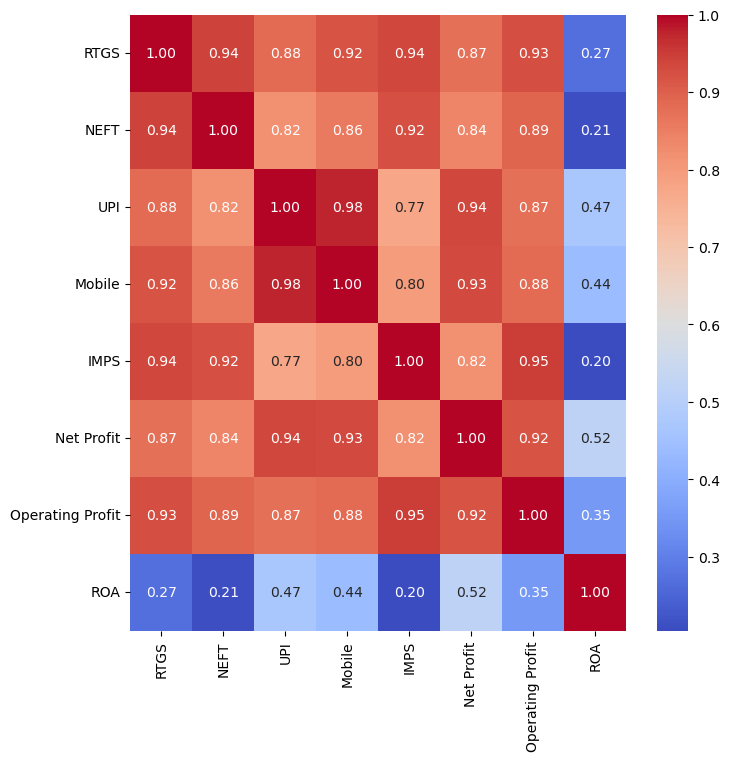

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only = True), annot = True, fmt='.2f', cmap = 'coolwarm')

In [30]:
df.columns

Index(['Quarter', 'Year', 'Bank Name', 'RTGS', 'NEFT', 'UPI', 'Mobile', 'IMPS',
       'Net Profit', 'Operating Profit', 'ROA'],
      dtype='object')

In [33]:
x=df[["RTGS","NEFT","UPI","Mobile","IMPS"]]
y=df["Net Profit"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [35]:
lasso = Lasso(alpha = 1.0)
model = lasso.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [37]:
R2 = r2_score(y_test,y_pred)
RMSE = root_mean_squared_error(y_test,y_pred)
Intercept = model.intercept_
Coefficients = model.coef_

In [39]:
Dict = {
    "Model":"Lasso Regression", "Intercept":Intercept,"RTGS Coefficient":Coefficients[0],
    "NEFT Coefficient":Coefficients[1],"UPI Coefficient":Coefficients[2],"Mobile Banking Coefficient":Coefficients[3],
    "IMPS Coefficient":Coefficients[4],"R Squared":R2, "Root Mean Squared Error":RMSE
}

In [41]:
table2 = pd.DataFrame(Dict,index = [0] )
table2

,Model,Intercept,RTGS Coefficient,NEFT Coefficient,UPI Coefficient,Mobile Banking Coefficient,IMPS Coefficient,R Squared,Root Mean Squared Error
0,Lasso Regression,-3724.561434,-958.168816,139.540165,9.641657,346.534577,102.854119,0.691861,15244.75635


In [43]:
styled_table2 = table2.style.format(precision = 4).set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
styled_table2

,Model,Intercept,RTGS Coefficient,NEFT Coefficient,UPI Coefficient,Mobile Banking Coefficient,IMPS Coefficient,R Squared,Root Mean Squared Error
0,Lasso Regression,-3724.5614,-958.1688,139.5402,9.6417,346.5346,102.8541,0.6919,15244.7564


Text(0.5, 0, 'Coefficient Value')

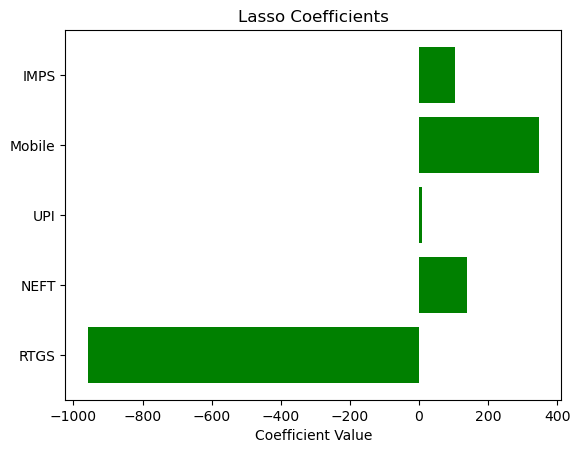

In [45]:
features = x_train.columns
plt.barh(features, Coefficients, color="Green")
plt.title("Lasso Coefficients")
plt.xlabel("Coefficient Value")

Text(0, 0.5, 'Predicted Net Profit')

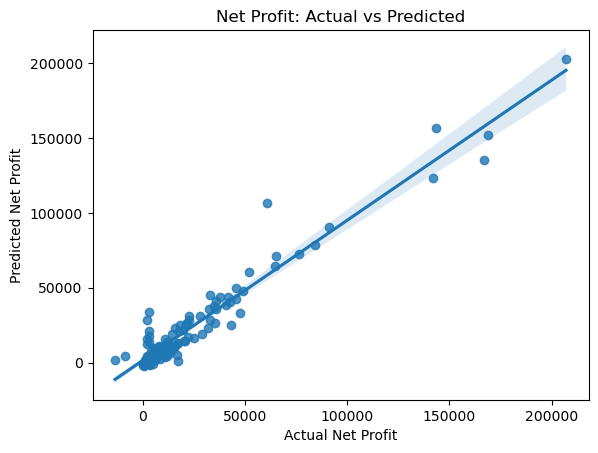

In [47]:
y_train_pred = model.predict(x_train)
sns.regplot(x = y_train, y = y_train_pred)
plt.title("Net Profit: Actual vs Predicted")
plt.xlabel("Actual Net Profit")
plt.ylabel("Predicted Net Profit")

<Figure size 1200x600 with 0 Axes>

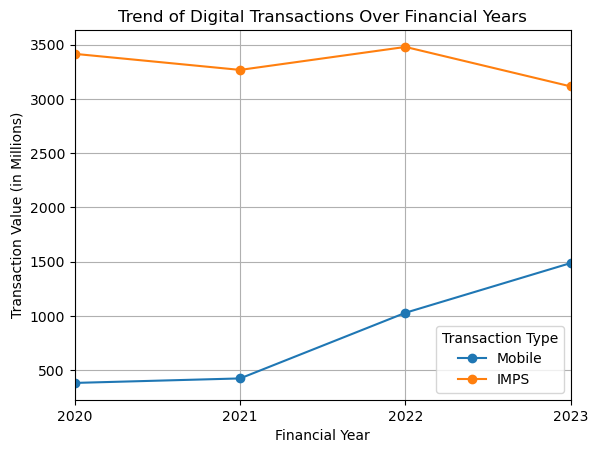

In [49]:

df["Financial Year"] = df["Year"].astype(str).str[:4].astype(int)

df["Financial Year"] = pd.to_datetime(df["Financial Year"].astype(str) + "-04-01")


yearly_trends = df.groupby(df["Financial Year"])[["Mobile", "IMPS"]].sum()


plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title("Trend of Digital Transactions Over Financial Years")
plt.xlabel("Financial Year")
plt.ylabel("Transaction Value (in Millions)")
plt.legend(title="Transaction Type")
plt.grid()
plt.show()


<Figure size 1200x600 with 0 Axes>

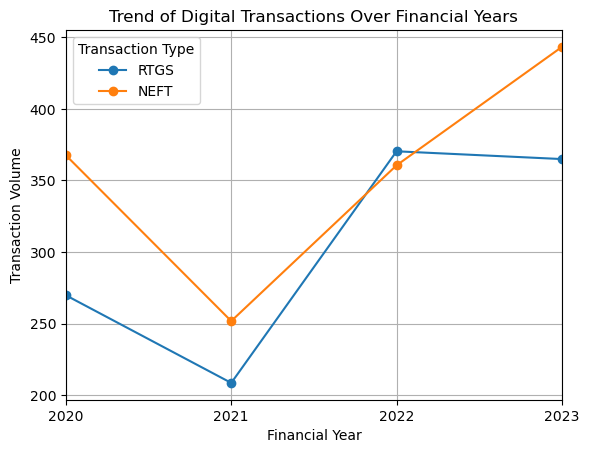

In [51]:

df["Financial Year"] = df["Year"].astype(str).str[:4].astype(int)

df["Financial Year"] = pd.to_datetime(df["Financial Year"].astype(str) + "-04-01")


yearly_trends = df.groupby(df["Financial Year"])[["RTGS", "NEFT"]].sum()


plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title("Trend of Digital Transactions Over Financial Years")
plt.xlabel("Financial Year")
plt.ylabel("Transaction Volume")
plt.legend(title="Transaction Type")
plt.grid()
plt.show()

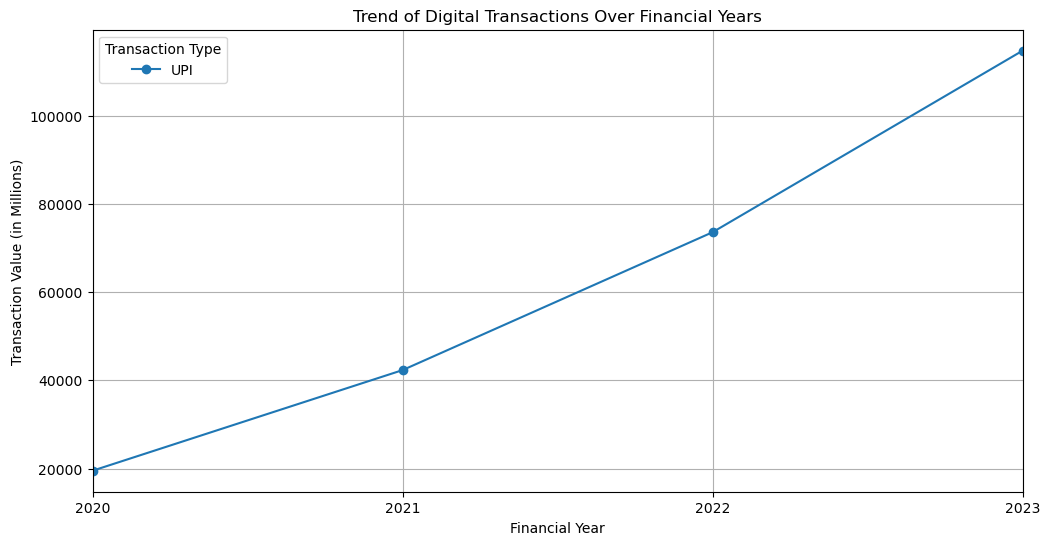

In [53]:

df["Financial Year"] = df["Year"].astype(str).str[:4].astype(int)

df["Financial Year"] = pd.to_datetime(df["Financial Year"].astype(str) + "-04-01")


yearly_trends = df.groupby(df["Financial Year"])["UPI"].sum()


plt.figure(figsize=(12, 6))
yearly_trends.plot(marker='o')
plt.title("Trend of Digital Transactions Over Financial Years")
plt.xlabel("Financial Year")
plt.ylabel("Transaction Value (in Millions)")
plt.legend(title="Transaction Type")
plt.grid()
plt.show()

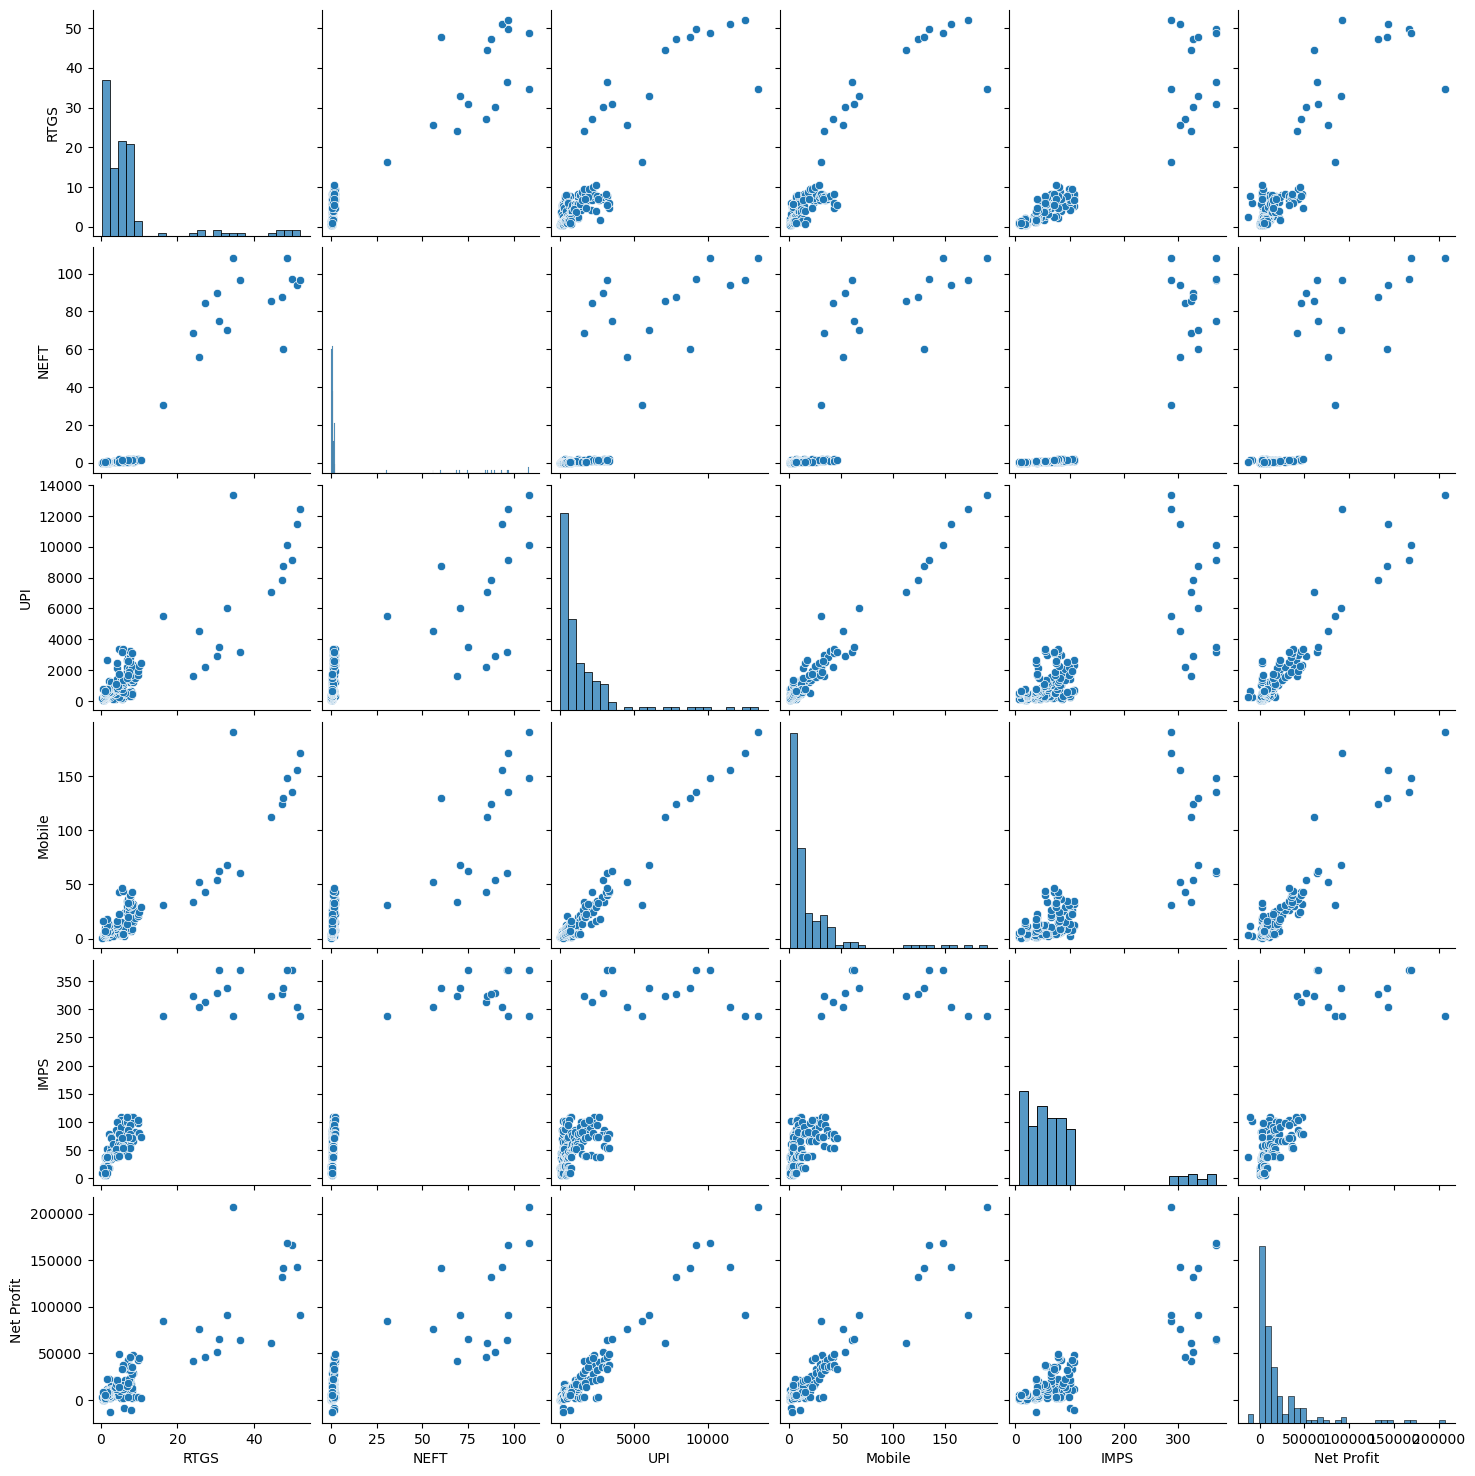

In [57]:
df1=df.drop(["Quarter","Year", "Bank Name","Operating Profit", "ROA"], axis = 1)
sns.pairplot(df1)

In [60]:
LR = LinearRegression()
X=df[["UPI", "Mobile"]]
Y=df["Net Profit"]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state = 12)
MLR = LR.fit(X_Train, Y_Train)
Y_Preds = MLR.predict(X_Test)
print(r2_score(Y_Test, Y_Preds))

0.8809970307123173


In [62]:
intercept = MLR.intercept_
coefficient = MLR.coef_
R2_Score = r2_score(Y_Test,Y_Preds)
rmse = root_mean_squared_error(Y_Test,Y_Preds)
Dict2 = {
    "Model":"Multiple Linear Regression", "Intercept":intercept, "UPI Coefficient":coefficient[0],
    "Mobile Coefficient": coefficient[1], "R Squared":R2_Score, "Root Mean Squared Error":rmse
}
Dict2

{'Model': 'Multiple Linear Regression',
 'Intercept': -0.26573394226215896,
 'UPI Coefficient': 7.23643037414745,
 'Mobile Coefficient': 476.05509960813566,
 'R Squared': 0.8809970307123173,
 'Root Mean Squared Error': 9601.360283894759}

In [64]:
table3 = pd.DataFrame(Dict2, index = [0])
table3

,Model,Intercept,UPI Coefficient,Mobile Coefficient,R Squared,Root Mean Squared Error
0,Multiple Linear Regression,-0.265734,7.23643,476.0551,0.880997,9601.360284


In [66]:
styled_table3 = table3.style.format(precision = 4).set_properties(**{
    'background-color': 'lightblue',
    'color': 'black',
    'border': '1px solid black',
    'text-align': 'center'
})
styled_table3

,Model,Intercept,UPI Coefficient,Mobile Coefficient,R Squared,Root Mean Squared Error
0,Multiple Linear Regression,-0.2657,7.2364,476.0551,0.8810,9601.3603


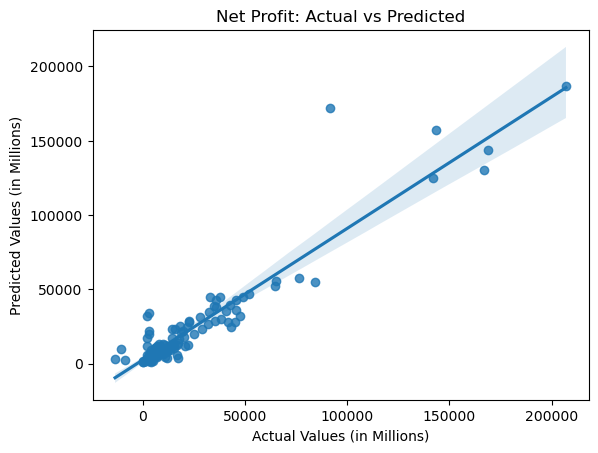

In [68]:
Y_Train_Preds = MLR.predict(X_Train)
sns.regplot(x = Y_Train, y = Y_Train_Preds)
plt.title("Net Profit: Actual vs Predicted")
plt.xlabel("Actual Values (in Millions)")
plt.ylabel("Predicted Values (in Millions)")
plt.show()

In [65]:
Scaler = StandardScaler()
x_train_scaled = Scaler.fit_transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [67]:
Model = lasso.fit(x_train_scaled, y_train)
Y_pred = Model.predict(x_test_scaled)
print(r2_score(y_test,Y_pred))

0.6917020716235083


In [69]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [71]:
Model2 = lasso.fit(x_train_scaled, y_train)
Y_pred = Model2.predict(x_test_scaled)
print(r2_score(y_test,Y_pred))

0.6911655382579251


In [73]:
LR = LinearRegression()
Model3 = LR.fit(x_train_scaled, y_train)
Y_pred = Model3.predict(x_test_scaled)
print(r2_score(y_test,Y_pred))

0.6918707626281262


In [75]:
LR = LinearRegression()
Model4 = LR.fit(x_train, y_train)
Y_pred = Model4.predict(x_test)
print(r2_score(y_test,Y_pred))

0.6918707626281421
